In [92]:
import numpy as np
import pandas as pd
import sympy as S
from sympy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [93]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [94]:
pd.options.display.max_rows = 10

# Information Entropy

We are in a position to discuss information entropy.  This will give us a
powerful perspective on how information passes between experiments, and will
prove important in certain machine learning algorithms.

There used to be a TV game show where the host would hide a prize behind
one of three doors and the contestant would have to pick one of the doors.
However, before opening the door of the contestant's choice, the host
would open one of the other doors and ask the contestant if she wanted to
change her selection.  This is the classic *Monty Hall* problem. The
question is should the contestant stay with her original choice or switch
after seeing what the host has revealed?  From the information theory
perspective, does the information environment change when the host reveals
what is behind one of the doors?  The important detail here is that the
host *never* opens the door with the prize behind it, regardless of the
contestant's choice. That is, the host *knows* where the prize is, but he
does not reveal that information directly to the contestant. This is the
fundamental problem information theory addresses --- how to aggregate and
reason about partial information. We need a concept of information that
can accommodate this kind of question.

## Information Theory Concepts

The Shannon *information content* of an outcome $x$ is defined as,

$$
h(x) = \log_2\frac{1}{P(x)}
$$

 where $P(x)$ is the probability of $x$.  The *entropy* of the ensemble
$X$ is defined to be the Shannon information content of

$$
H(X) = \sum_x P(x) \log_2 \frac{1}{P(x)}
$$

 It is no accident that the entropy has this functional form
as the expectation of $h(x)$. It leads to a deep and powerful theory
of information. 

To get some intuition about what information entropy means, consider a sequence
of three-bit numbers where each individual bit is equally likely. Thus, the
individual information content of a single bit is $h(x) = \log_2 (2) = 1$. The
units of entropy are *bits* so this says that information content of a single bit
is one bit. Because the three-bit number has elements that are mutually
independent and equally likely, the information entropy of the
three-bit number is $H(X) = 2^3 \times  \log_2(2^3)/8=3 $. Thus,
the basic idea of information content at least makes sense at this level.

A better way to interpret this question is as how much information would I have
to provide in order to uniquely encode an arbitrary three-bit number? In this
case, you would have to answer three questions: *Is the first bit zero or one?
Is the second bit zero or one? Is the third bit zero or one?* Answering
these questions uniquely specifies the unknown three-bit number. Because the
bits are mutually independent, knowing the state of any of the bits does not
inform the remainder.

Next, let's consider a situation that lacks this mutual independence. Suppose
in a group of nine otherwise identical balls there is a heavier  one.
Furthermore, we also have a measuring scale that indicates whether one side is
heavier, lighter, or equal to the other.  How could we identify the heavier
ball? At the outset, the information content, which measures the uncertainty of
the situation is $\log_2(9)$ because one of the nine balls is heavier. [Figure](#fig:Information_Entropy_001) shows
one strategy. We could arbitrarily select out one of the balls (shown by the
square), leaving the remaining eight to be balanced. The thick, black
horizontal line indicates the scale.  The items below and above this line
indicate the counterbalanced sides of the scale.

<!-- dom:FIGURE: [fig-probability/NineBall_01.jpg, width=500 frac=0.75] One heavy ball is hidden among eight identical balls. By weighing groups sequentially, we can determine the heavy ball. <div id="fig:Information_Entropy_001"></div> -->
<!-- begin figure -->
<div id="fig:Information_Entropy_001"></div>

<p>One heavy ball is hidden among eight identical balls. By weighing groups sequentially, we can determine the heavy ball.</p>
<img src="fig-probability/NineBall_01.jpg" width=500>

<!-- end figure -->


If we get lucky, the scale will report that the group of four walls on either
side of the balance are equal in weight. This means that the ball that was
omitted is the heavier one. This is indicated by the hashed left-pointing
arrow. In this case, all the uncertainty has evaporated, and the *informational
value* of that one weighing is equal to $\log_2(9)$.  In other words, the scale
has reduced the uncertainty to zero (i.e., found the heavy ball). On the other
hand, the scale could report that the upper group of four balls is heavier
(black, upward-pointing arrow) or lighter (gray, downward-pointing arrow). In
this case, we cannot isolate the heavier ball until we perform all of the
indicated weighings, moving from left-to-right. Specifically, the four balls on
the heavier side have to be split by a subsequent weighing into two balls and
then to one ball before the heavy ball can be identified.  Thus, this process
takes three weighings. The first one has information content $\log_2(9/8)$, the
next has $\log_2(4)$, and the final one has $\log_2(2)$.  Adding all these up
sums to $\log_2(9)$. Thus, whether or not the heavier ball is isolated in the
first weighing, the strategy consumes $\log_2(9)$ bits, as it must, to find the
heavy ball.

<!-- dom:FIGURE: [fig-probability/NineBall_02.jpg, width=500 frac=0.75] For this strategy, the balls are broken up into three groups of equal size and subsequently weighed.  <div id="fig:Information_Entropy_002"></div> -->
<!-- begin figure -->
<div id="fig:Information_Entropy_002"></div>

<p>For this strategy, the balls are broken up into three groups of equal size and subsequently weighed.</p>
<img src="fig-probability/NineBall_02.jpg" width=500>

<!-- end figure -->


However, this is not the only strategy. [Figure](#fig:Information_Entropy_002)
shows another.  In this approach, the nine balls are split up into three groups
of three balls apiece. Two groups are weighed. If they are of equal weight,
then this means the heavier ball is in the group that was left out (dashed
arrow). Then, this group is split into two groups, with one element left out.
If the two balls on the scale weigh the same, then it means the excluded one is
the heavy one. Otherwise, it is one of the balls on the scale. The same process
follows if one of the initially weighed groups is heavier (black upward-facing
arrow) or lighter (gray lower-facing arrow). As before the information content
of the situation is $\log_2(9)$. The first weighing reduces the uncertainty of
the situation by $\log_2(3)$ and the subsequent weighing reduces it by another
$\log_2(3)$.  As before, these sum to $\log_2(9)$, but here we only need two
weighings whereas the first strategy in [Figure](#fig:Information_Entropy_001) takes
an average of $1/9 + 3*8/9 \approx 2.78$ weighings, which is more than two.

Why does the second strategy use fewer weighings?  To reduce weighings, we need
each weighing to adjudicate equally probable situations as many times as
possible. Choosing one of the nine balls at the outset (i.e, first strategy in
[Figure](#fig:Information_Entropy_001)) does not do this because the
probability of selecting the correct ball is $1/9$. This does not create a
equiprobable situation in the process. The second strategy leaves an equally
probable situation at every stage (see [Figure](#fig:Information_Entropy_002)), so it extracts the most information out of
each weighing as possible. Thus, the information content tells us how many bits
of information have to be resolved using *any* strategy (i.e., $\log_2(9)$ in
this example). It also illuminates how to efficiently remove uncertainty;
namely, by adjudicating equiprobable situations as many times as possible.  

## Properties of Information Entropy

Now that we have the flavor of the concepts, consider the following properties
of the information entropy,

$$
H(X) \ge 0
$$

 with equality if and only if $P(x)=1$ for  exactly one $x$.
Intuitively, this means that when just one of the items in the ensemble is
known absolutely (i.e., with $P(x)=1$), the uncertainty collapses to zero.
Also note that entropy is maximized when $P$ is uniformly distributed across
the elements of the ensemble. This is illustrated in [Figure](#fig:Information_Entropy_003) for the case of two outcomes. In other words,
information entropy is maximized when the two conflicting alternatives are
equally probable. This is the mathematical reason why using the scale in the
last example to adjudicate equally probable situations was so useful for
abbreviating the weighing process.

In [13]:
S.init_printing()
p = S.symbols('p')

In [19]:
S.solve(S.diff(p*S.log(1/p,2) + (1-p)*S.log(1/(1-p),2),p),p)

/home/hvribeiro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/hvribeiro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


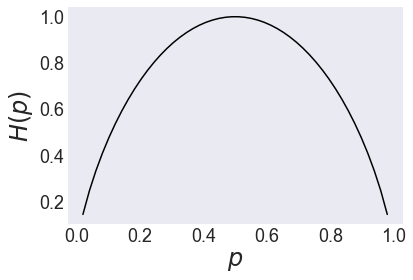

In [20]:
p = np.linspace(0,1,50)
fig,ax=plt.subplots()
#fig.set_size_inches((14,7))
ax.plot(p,p*np.log2(1/p)+(1-p)*np.log2(1/(1-p)),'k-')
ax.set_xlabel('$p$',fontsize=24)
ax.set_ylabel('$H(p)$',fontsize=24)
ax.grid()

<!-- dom:FIGURE: [fig-probability/information_entropy_003.png, width=500 frac=0.75] The information entropy is maximized when $p=1/2$.  <div id="fig:Information_Entropy_003"></div> -->
<!-- begin figure -->
<div id="fig:Information_Entropy_003"></div>

<p>The information entropy is maximized when $p=1/2$.</p>
<img src="fig-probability/information_entropy_003.png" width=500>

<!-- end figure -->


Most importantly, the concept of entropy extends jointly as follows,

$$
H(X,Y) = \sum_{x,y} P(x,y) \log_2 \frac{1}{P(x,y)}
$$

 If and only if $X$ and $Y$ are independent, entropy becomes
additive,

$$
H(X,Y) =  H(X)+H(Y)
$$

## Kullback-Leibler Divergence

Notions of information entropy lead to notions of distance between probability
distributions that will become important for machine learning methods.  The
Kullback-Leibler divergence between two probability distributions $P$ and $Q$
that are defined over the same set is defined as,

$$
D_{KL}(P,Q) = \sum_x P(x) \log_2 \frac{P(x)}{Q(x)}
$$

 Note that $D_{KL}(P,Q) \ge 0$ with equality if and only if $P=Q$.
Sometimes the Kullback-Leibler divergence is called the Kullback-Leibler
distance, but it is not formally a distance metric because it is asymmetrical
in $P$ and $Q$. The Kullback-Leibler divergence defines a relative entropy as
the loss of information if $P$ is modeled in terms of $Q$.  There is an
intuitive way to interpret the Kullback-Leibler divergence and understand its
lack of symmetry.  Suppose we have a set of messages to transmit, each with a
corresponding probability $\lbrace
(x_1,P(x_1)),(x_2,P(x_2)),\ldots,(x_n,P(x_n)) \rbrace$. Based on what we know
about information entropy, it makes sense to encode the length of the message
by $\log_2 \frac{1}{p(x)}$ bits. This parsimonious strategy means that more
frequent messages are encoded with fewer bits. Thus, we can rewrite the entropy
of the situation as before,

$$
H(X) = \sum_{k} P(x_k) \log_2 \frac{1}{P(x_k)}
$$

 Now, suppose we want to transmit the same set of messages, but with a
different set of probability weights,  $\lbrace
(x_1,Q(x_1)),(x_2,Q(x_2)),\ldots,(x_n,Q(x_n)) \rbrace$.  In this situation, we
can define the cross-entropy as

$$
H_q(X) = \sum_{k} P(x_k) \log_2 \frac{1}{Q(x_k)}
$$

 Note that only the purported length of the encoded message has
changed, not the probability of that message. The difference between these two
is the Kullback-Leibler divergence,

$$
D_{KL}(P,Q)=H_q(X)-H(X)=\sum_x P(x) \log_2 \frac{P(x)}{Q(x)}
$$

 In this light, the Kullback-Leibler divergence is the average
difference in the  encoded lengths of the same set of messages under two
different probability regimes. This should help explain the lack of symmetry of
the Kullback-Leibler divergence --- left to themselves, $P$ and $Q$ would
provide the optimal-length encodings separately, but there can be no necessary
symmetry in how each regime would rate the informational value of each message
($Q(x_i)$ versus $P(x_i)$). Given that each encoding is optimal-length in its
own regime means that it must therefore be at least sub-optimal in another,
thus giving rise to the Kullback-Leibler divergence. In the case where the
encoding length of all messages remains the same for the two regimes, then the
Kullback-Leibler divergence is zero [^Mackay].

[^Mackay]: The best, easy-to-understand presentation of this material is chapter
four of Mackay's text [[mackay2003information]](#mackay2003information). Another good reference is
chapter four of [[hastie2013elements]](#hastie2013elements).

# Moment Generating Functions

Generating moments usually involves integrals that are extremely
difficult to compute. Moment generating functions make this much, much
easier. The moment generating function is defined as,

$$
M(t) = \mathbb{E}(\exp(t X))
$$

 The first moment is the mean, which we can easily compute from 
$M(t)$ as,

$$
\begin{align*}
\frac{dM(t)}{dt} &= \frac{d}{dt}\mathbb{E}(\exp(t X)) = \mathbb{E}\frac{d}{dt}(\exp(t X))\\\
                 &= \mathbb{E}(X \exp(t X))  \\\
\end{align*}
$$

 Now, we have to set $t=0$ and we have the mean,

$$
M^{(1)}(0) = \mathbb{E}(X)
$$

 continuing this derivative process again, we obtain the second moment as,

$$
\begin{align*}
M^{(2)}(t) &= \mathbb{E}(X^2\exp(t X)) \\\
M^{(2)}(0) &= \mathbb{E}(X^2)
\end{align*}
$$

 With this in hand, we can easily compute the variance as,

$$
\mathbb{V}(X) = \mathbb{E}(X^2) -\mathbb{E}(X)^2=M^{(2)}(0)-M^{(1)}(0)^2
$$

**Example.** Returning to our favorite binomial distribution, let's compute
some moments using Sympy.

In [24]:
p,t = S.symbols('p t',positive=True)
x = stats.Binomial('x',10,p)
mgf = stats.E(S.exp(t*x))

 Now, let's compute the first moment (aka, mean) using
the usual integration method and using moment generating functions,

In [29]:
S.simplify(stats.E(x))

In [30]:
S.simplify(S.diff(mgf,t).subs(t,0))

 Otherwise, we can compute this directly as follows,

In [31]:
S.simplify(stats.moment(x,1)) # mean

In [32]:
S.simplify(stats.moment(x,2)) # 2nd moment

 In general, the moment generating function for the binomial
distribution is the following,

$$
M_X(t) = \left(p\left(e^t-1\right)+1\right) ^n
$$

A key aspect of moment generating functions is that they are unique identifiers
of probability distributions.  By the uniqueness theorem, given two random
variables $X$ and $Y$, if their respective moment generating functions are
equal, then the corresponding probability distribution functions are equal.

**Example.** Let's use the uniqueness theorem to consider the following
problem. Suppose we know that the probability distribution of $X$ given $U=p$
is binomial with parameters $n$ and $p$. For example, suppose $X$ represents the
number of heads in $n$ coin flips, given the probability of heads is $p$. We 
want to find the unconditional distribution of $X$. Writing out the
moment generating function as the following,

$$
\mathbb{E}(e^{t X}\vert U=p) = (p e^t + 1-p)^n
$$

 Because $U$ is uniform over the unit interval, we can 
integrate this part out

$$
\begin{align*}
\mathbb{E}(e^{t X}) &=\int_0^1 (p e^t + 1-p)^n dp \\\
                    &= \frac{1}{n+1} \frac{1-e^{t(n+1)}}{1-e^t} \\\
                    &= \frac{1}{n+1} (1+e^t+e^{2t}+e^{3t}+\ldots+e^{n t}) \\\
\end{align*}
$$

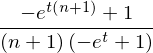

In [47]:
p,t,n = S.symbols('p t n',positive=True)

S.simplify(S.integrate((p*S.exp(t)+1-p)**n,(p,0,1)))

 Thus, the moment generating function of $X$ corresponds to that of a
random variable that is equally likely to be any of the values $0,1,\ldots,n$.
This is another way of saying that the distribution of $X$ is discrete uniform
over $\lbrace 0,1,\ldots,n \rbrace$. Concretely, suppose we have a box of coins
whose individual probability of heads is unknown and  that we  dump the box on
the floor, spilling all of the coins. If we then count the number of coins facing
heads-up, that distribution is uniform.

Moment generating functions are useful for deriving distributions of
sums of independent random variables. Suppose $X_0$ and $X_1$ are independent
and $Y=X_0+X_1$. Then, the moment generating function of $Y$ follows
from the properties of the expectation,

$$
\begin{align*}
M_Y(t) &= \mathbb{E}(e^{t Y}) =  \mathbb{E}(e^{t X_0 + t X_1}) \\\
       &= \mathbb{E}(e^{t X_0} e^{ t X_1 }) =\mathbb{E}(e^{t X_0})\mathbb{E}(e^{t X_1}) \\\
       &= M_{X_0}(t)M_{X_1}(t)
\end{align*}
$$

**Example.** Suppose we have two normally distributed random variables, 
$X_0\sim \mathcal{N}(\mu_0,\sigma_0)$ and $ X_1\sim \mathcal{N}(\mu_1,\sigma_1)$.
We can save some tedium by exploring this in Sympy,

In [39]:
S.var('x:2',real=True)
S.var('mu:2',real=True)
S.var('sigma:2',positive=True)
S.var('t',positive=True)
x0=stats.Normal(x0,mu0,sigma0)
x1=stats.Normal(x1,mu1,sigma1)

**Programming Tip.**

The `S.var` function defines the variable and injects it into the global
namespace. This is sheer laziness. It is more expressive to define variables
explicitly as in `x = S.symbols('x')`. Also notice that we used the Greek names
for the `mu` and `sigma` variables.  This will come in handy later when we want
to render the equations in the Jupyter/IPython notebook which understands
how to typeset these symbols in \LaTeX{}. The `var('x:2')` creates two
symbols, `x0` and `x1`. Using the colon this way makes it easy to generate
array-like sequences of symbols.



 In the next block we compute the moment generating functions

In [40]:
mgf0 = S.simplify(stats.E(S.exp(t*x0)))
mgf1 = S.simplify(stats.E(S.exp(t*x1)))
mgfY = S.simplify(mgf0*mgf1)

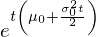

In [41]:
mgf0

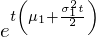

In [42]:
mgf1

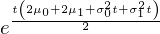

In [43]:
mgfY

 The moment generating functions an individual normally distributed
random variable is the following,

$$
e^{\mu_{0} t + \frac{\sigma_{0}^{2} t^{2}}{2}}
$$

 Note the coefficients of $t$. To show that $Y$ is normally
distributed, we want to match the moment generating function of $Y$ to this
format. The following is the form of the moment generating function of $Y$,

$$
M_Y(t)=e^{\frac{t}{2} \left(2 \mu_{0} + 2 \mu_{1} + \sigma_{0}^{2} t + \sigma_{1}^{2} t\right)}
$$

 We can extract the exponent using Sympy and collect on the $t$
variable using the following code,

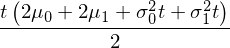

In [45]:
S.log(mgfY)

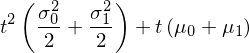

In [46]:
S.collect(S.expand(S.log(mgfY)),t)

 Thus, by the uniqueness theorem, $Y$ is normally distributed with
$\mu_Y=\mu_0+\mu_1$ and $\sigma_Y^2=\sigma_0^2+\sigma_1^2$.

**Programming Tip.**

When using the Jupyter/IPython notebook, you can do `S.init_printing` to get
the mathematical typesetting to work in the browser. Otherwise, if you want to
keep the raw expression and to selectively render to \LaTeX{}, then you can
`from IPython.display import Math`, and then use `Math(S.latex(expr))` to see
the typeset version of the expression.

# Monte Carlo Sampling Methods

So far, we have studied analytical ways to transform random variables and how
to augment these methods using Python. In spite of all this, we frequently must
resort to purely numerical methods to solve real-world problems.  Hopefully,
now that we have seen the deeper theory, these numerical methods feel more
concrete.  Suppose we want to generate samples of a given density, $f(x)$,
given we already can generate samples from a uniform distribution,
$\mathcal{U}[0,1]$.  How do we know a random sample $v$ comes from the $f(x)$
distribution?  One approach is to look at how a histogram of samples of $v$
approximates $f(x)$. Specifically,

<!-- Equation labels as ordinary links -->
<div id="eq:mc01"></div>

$$
\begin{equation}
\mathbb{P}( v \in N_{\Delta}(x) )  = f(x) \Delta x 
\end{equation}
\label{eq:mc01} \tag{1}
$$

<!-- dom:FIGURE: [fig-probability/Sampling_Monte_Carlo_000.png, width=500 frac=0.75] The histogram approximates the target probability density. <div id="fig:Sampling_Monte_Carlo_000"></div> -->
<!-- begin figure -->
<div id="fig:Sampling_Monte_Carlo_000"></div>

<p>The histogram approximates the target probability density.</p>
<img src="fig-probability/Sampling_Monte_Carlo_000.png" width=500>

<!-- end figure -->


 which says that the probability that a sample is in some $N_\Delta$
neighborhood of $x$ is approximately $f(x)\Delta x$. [Figure](#fig:Sampling_Monte_Carlo_000) shows the target probability density function
$f(x)$ and a histogram that approximates it. The histogram is generated from
samples $v$. The hatched rectangle in the center illustrates Equation (1). The area of this rectangle is approximately $f(x)\Delta x$ where
$x=0$, in this case. The width of the rectangle is $N_{\Delta}(x)$ The quality
of the approximation may be clear visually, but to know that $v$ samples are
characterized by $f(x)$, we need the statement of Equation (1), which
says that the proportion of samples $v$  that fill the hatched rectangle is
approximately equal to $f(x)\Delta x$.

Now that we know how to evaluate samples $v$ that are characterized by the density
$f(x)$, let's consider how to create these samples for both discrete and
continuous random variables.

## Inverse CDF Method for Discrete Variables

Suppose we want to generate samples from a fair six-sided die.  Our workhouse
uniform random variable is defined continuously over the unit interval  and the
fair six-sided die is discrete. We must first create a mapping between the
continuous random variable $u$ and the discrete outcomes of the die. This
mapping is shown in [Figure](#fig:Sampling_Monte_Carlo_0001) where the unit
interval is broken up into segments, each of length $1/6$. Each individual
segment is assigned to one of the die outcomes. For example, if $u \in
[1/6,2/6)$, then the outcome for the die is $2$. Because the die is fair, all
segments on the unit interval are the same length. Thus, our new random
variable $v$ is derived from $u$ by this assignment.

<!-- dom:FIGURE: [fig-probability/Sampling_Monte_Carlo_0001.png, width=500 frac=0.75] A uniform distribution random variable on the unit interval is assigned to the six outcomes of a fair die using these segements. <div id="fig:Sampling_Monte_Carlo_0001"></div> -->
<!-- begin figure -->
<div id="fig:Sampling_Monte_Carlo_0001"></div>

<p>A uniform distribution random variable on the unit interval is assigned to the six outcomes of a fair die using these segements.</p>
<img src="fig-probability/Sampling_Monte_Carlo_0001.png" width=500>

<!-- end figure -->


For example, for $v=2$, we have,

$$
\mathbb{P}(v=2) = \mathbb{P}(u\in [1/6,2/6)) = 1/6
$$

 where, in the language of the Equation (1), $f(x)=1$
(uniform distribution), $\Delta x = 1/6$, and $N_\Delta (2)=[1/6,2/6)$.
Naturally, this pattern holds for all the other die outcomes in
$\left\{1,2,3,..,6\right\}$.  Let's consider a quick simulation to make this
concrete. The following code generates uniform random samples and stacks them
in a Pandas dataframe.

In [62]:
u = np.random.rand(100)
df = pd.DataFrame(data=u,columns=['u'])

In [63]:
df

,u
0,0.783139
1,0.332738
2,0.682446
3,0.111773
4,0.569471
...,...
95,0.053677
96,0.677172
97,0.835533
98,0.483133


 The next block uses `pd.cut` to map the individual samples to
the set $\left\{1,2,\ldots,6\right\}$ labeled `v`.

In [56]:
labels = [1,2,3,4,5,6]
df['v']=pd.cut(df.u,np.linspace(0,1,7),
               include_lowest=True,labels=labels)

In [57]:
df

,u,v
0,0.535266,4
1,0.392870,3
2,0.067318,1
3,0.427615,3
4,0.633175,4
...,...,...
95,0.086108,1
96,0.571616,4
97,0.097523,1
98,0.750594,5


 This is what the dataframe contains. The `v` column contains
the samples drawn from the fair die.

 The following is a count of the number of samples in each group. There
should be roughly the same number of samples in each group because the die is fair.

In [59]:
100/6.

In [58]:
df.groupby('v').count()
    

,u
v,
1,21
2,15
3,17
4,20
5,14
6,13


 So far, so good. We now have a way to simulate a fair
die from a uniformly distributed random variable.

To extend this to unfair die, we need only make some small adjustments to this
code.  For example, suppose that we want an unfair die so that
$\mathbb{P}(1)=\mathbb{P}(2)=\mathbb{P}(3)=1/12$ and
$\mathbb{P}(4)=\mathbb{P}(5)=\mathbb{P}(6)=1/4$. The only change we have to
make is with `pd.cut` as follows,

In [64]:
df['v']=pd.cut(df.u,[0,1/12,2/12,3/12,2/4,3/4,1],
               include_lowest=True,labels=labels)

In [65]:
df.groupby('v').count()/df.shape[0]
      

,u
v,
1,0.06
2,0.08
3,0.07
4,0.21
5,0.23
6,0.35


In [67]:
(1/12.,1/4)

 where now these are the individual probabilities of each digit. You
can take more than `100` samples to get a clearer view of the individual
probabilities but the mechanism for generating them is the same. The method is
called the inverse CDF [^CDF] method because the CDF
(namely,$\texttt{[0,1/12,2/12,3/12,2/4,3/4,1]}$) in the last example has been
inverted (using the `pd.cut` method) to generate the samples.  
The inversion is easier to see for continuous variables, which we consider
next.

[^CDF]: Cumulative density function. Namely, $F(x)=\mathbb{P}(X < x)$.


## Inverse CDF Method for Continuous Variables

The method above applies to continuous random variables, but now we have to use
squeeze the  intervals down to individual points. In the example above, our
inverse function was a piecewise function that operated on uniform random
samples. In this case, the piecewise function collapses to a continuous inverse
function.  We want to generate random samples for a CDF that is invertible.
As before, the criterion for generating an appropriate sample $v$ is the
following,

$$
\mathbb{P}(F(x) < v < F(x+\Delta x)) =  F(x+\Delta x) - F(x) = \int_x^{x+\Delta x} f(u) du \approx  f(x) \Delta x
$$

 which is saying that the probability that the sample $v$ is contained
in a $\Delta x$ interval is approximately equal to the density function, $f(x)
\Delta x$, at that point. Once again, the trick is to use a uniform random
sample $u$ and an invertible CDF $F(x)$ to construct these samples.  Note
that for a uniform random variable $u \sim \mathcal{U}[0,1]$, we have,

$$
\begin{align*}
\mathbb{P}(x < F^{-1}(u) < x+\Delta x) & = \mathbb{P}(F(x) < u < F(x+\Delta x)) \\\
                                       & =  F(x+\Delta x) - F(x) \\\
                                       & = \int_x^{x+\Delta x} f(p) dp \approx  f(x) \Delta x
\end{align*}
$$

 This means that $ v=F^{-1}(u) $ is distributed according to $f(x)$,
which is what we want.  

Let's try this to generate samples from the
exponential distribution,

$$
f_{\alpha}(x) = \alpha e^{ -\alpha x }
$$

 which has the following CDF,

$$
F(x) = 1-e^{ -\alpha x  }
$$

 and corresponding inverse,

$$
F^{-1}(u)  = \frac{1}{\alpha}\ln \frac{1}{(1-u)}
$$

 Now, all we have to do is generate some uniformly distributed
random samples and then feed them into $F^{-1}$.

In [98]:
from numpy import array, log
import scipy.stats
alpha = 1.   # distribution parameter
nsamp = 10000 # num of samples
# define uniform random variable
u = scipy.stats.uniform(0,1)
# define inverse function
Finv = lambda u: 1/alpha*log(1/(1-u))
# apply inverse function to samples
v = array(list(map(Finv,u.rvs(nsamp))))

 Now, we have the samples from the exponential distribution, but how
do we know the method is correct with samples distributed accordingly?
Fortunately, `scipy.stats` already has a exponential distribution, so we can
check our work against the reference using a *probability plot* (i.e.,  also
known as a *quantile-quantile* plot).  The following code sets up the
probability plot from `scipy.stats`.

Text(0.5,1,'Probability Plot')

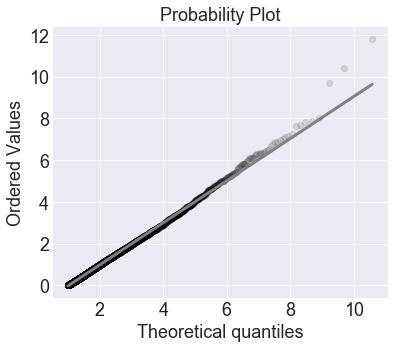

In [103]:
from matplotlib.pylab import setp, subplots

fig, ax = plt.subplots()
fig.set_size_inches((6,5))


scipy.stats.probplot(v,(1,),dist='expon',plot=ax)
line=ax.get_lines()[0]
setp(line,'color','k')
setp(line,'alpha',.1)
line=ax.get_lines()[1]
setp(line,'color','gray')
setp(line,'lw',3.0)
setp(ax.yaxis.get_label(),'fontsize',18)
setp(ax.xaxis.get_label(),'fontsize',18)
ax.set_title('Probability Plot',fontsize=18)
#ax.grid()
#fig.tight_layout()
#fig.savefig('fig-probability/Sampling_Monte_Carlo_005.png')

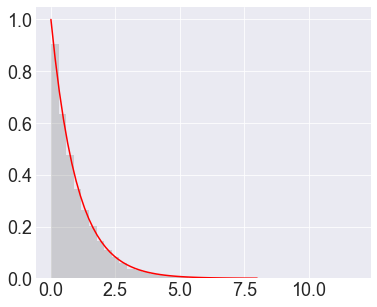

In [100]:
f, ax = plt.subplots(figsize=(6,5))
ax.hist(v,density=1,bins=40,alpha=.3,color='gray');
x = np.linspace(0,8)
ax.plot(x, np.exp(-x), color='red');

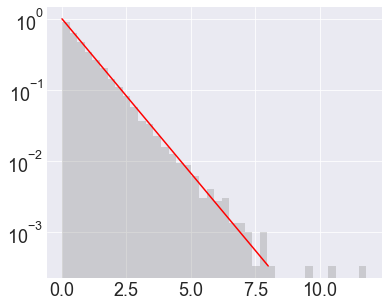

In [101]:
f, ax = plt.subplots(figsize=(6,5))
ax.hist(v,density=1,bins=40,alpha=.3,color='gray',log=True);
x = np.linspace(0,8)
ax.semilogy(x, np.exp(-x), color='red');

 Note that we have to supply an axes object (`ax`) for it to draw on.
The result is [Figure](#fig:Sampling_Monte_Carlo_005). The more the samples
line match the diagonal line, the more they match the reference distribution
(i.e., exponential distribution in this case). You may also want to try
`dist=norm` in the code above To see what happens when the normal distribution
is the reference distribution.

<!-- dom:FIGURE: [fig-probability/Sampling_Monte_Carlo_005.png, width=500 frac=0.85] The samples created using the inverse cdf method match the exponential reference distribution. <div id="fig:Sampling_Monte_Carlo_005"></div> -->
<!-- begin figure -->
<div id="fig:Sampling_Monte_Carlo_005"></div>

<p>The samples created using the inverse cdf method match the exponential reference distribution.</p>
<img src="fig-probability/Sampling_Monte_Carlo_005.png" width=500>

<!-- end figure -->


## Rejection Method

In some cases, inverting the CDF may be impossible. The *rejection*
method can handle this situation. The idea is to pick two uniform random
variables $u_1,u_2 \sim \mathcal{U}[a,b]$ so that

$$
\mathbb{P}\left(u_1 \in N_{\Delta}(x) \bigwedge u_2 < \frac{f(u_1)}{M} \right) \hspace{0.5em} \approx \frac{\Delta x}{b-a} \frac{f(u_1)}{M}
$$

 where we take $x=u_1$ and $f(x) < M $.  This is a two-step process.
First, draw $u_1$ uniformly from the interval $[a,b]$. Second,  feed it into
$f(x)$ and if $u_2 < f(u_1)/M$, then you have a valid sample for $f(x)$. Thus,
$u_1$ is the proposed sample from $f$ that may or may not be rejected depending
on $u_2$. The only job of the $M$ constant is to scale down the $f(x)$ so that
the $u_2$ variable can span the range.  The *efficiency* of this method is the
probability of accepting $u_1$ which comes from integrating out the above
approximation,

$$
\int \frac{f(x)}{M(b-a)} dx = \frac{1}{M(b-a)} \int f(x)dx =\frac{1}{M(b-a)}
$$

 This means that we don't want an unecessarily large $M$ because that
makes it more likely that samples will be discarded. 

Let's try this method for a density that does not have a continuous inverse [^normalization]. 

[^normalization]: Note that this example density does not *exactly* integrate
out to one like a probability density function should, but the normalization
constant for this is distracting for our purposes here.

$$
f(x) = \exp\left(-\frac{(x-1)^2}{2x} \right) (x+1)/12
$$

 where $x>0$. The following code implements the rejection plan.

In [13]:
import numpy as np
x = np.linspace(0.001,15,100)
f= lambda x: np.exp(-(x-1)**2/2./x)*(x+1)/12.
fx = f(x)
M=0.3                          # scale factor
u1 = np.random.rand(10000)*15  # uniform random samples scaled out
u2 = np.random.rand(10000)     # uniform random samples
idx,= np.where(u2<=f(u1)/M)    # rejection criterion
v = u1[idx]

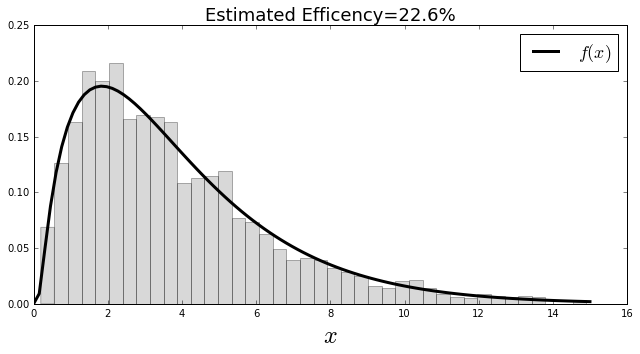

In [14]:
fig,ax=subplots()
fig.set_size_inches((9,5))
_=ax.hist(v,normed=1,bins=40,alpha=.3,color='gray')
_=ax.plot(x,fx,'k',lw=3.,label='$f(x)$')
_=ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)),
             fontsize=18)
_=ax.legend(fontsize=18)
_=ax.set_xlabel('$x$',fontsize=24)
fig.tight_layout()
#fig.savefig('fig-probability/Sampling_Monte_Carlo_007.png')

 [Figure](#fig:Sampling_Monte_Carlo_007) shows a histogram of the
so-generated samples that nicely fits the probability density function. The
title in the figure shows the efficiency, which is poor. It means that we threw
away most of the proposed samples.  Thus, even though there is nothing
conceptually wrong with this result, the low efficiency must be fixed, as a
practical matter.  [Figure](#fig:Sampling_Monte_Carlo_008) shows where the
proposed samples were rejected. Samples under the curve were retained (i.e.,
$u_2 < \frac{f(u_1)}{M}$) but the vast majority of the samples are outside this
umbrella.

<!-- dom:FIGURE: [fig-probability/Sampling_Monte_Carlo_007.png, width=500 frac=0.75] The rejection method generate samples in the histogram that nicely match the target distribution. Unfortunately, the efficiency is not so good. <div id="fig:Sampling_Monte_Carlo_007"></div> -->
<!-- begin figure -->
<div id="fig:Sampling_Monte_Carlo_007"></div>

<p>The rejection method generate samples in the histogram that nicely match the target distribution. Unfortunately, the efficiency is not so good.</p>
<img src="fig-probability/Sampling_Monte_Carlo_007.png" width=500>

<!-- end figure -->

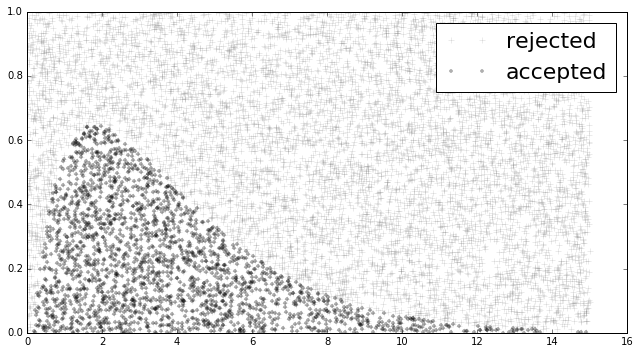

In [15]:
fig,ax=subplots()
fig.set_size_inches((9,5))
_=ax.plot(u1,u2,'+',label='rejected',alpha=.3,color='gray')
_=ax.plot(u1[idx],u2[idx],'.',label='accepted',alpha=.3,color='k')
_=ax.legend(fontsize=22)
fig.tight_layout()
#fig.savefig('fig-probability/Sampling_Monte_Carlo_008.png')

<!-- dom:FIGURE: [fig-probability/Sampling_Monte_Carlo_008.png, width=500 frac=0.75] The proposed samples under the curve were accepted and the others were not. This shows the majority of samples were rejected.  <div id="fig:Sampling_Monte_Carlo_008"></div> -->
<!-- begin figure -->
<div id="fig:Sampling_Monte_Carlo_008"></div>

<p>The proposed samples under the curve were accepted and the others were not. This shows the majority of samples were rejected.</p>
<img src="fig-probability/Sampling_Monte_Carlo_008.png" width=500>

<!-- end figure -->


The rejection method uses $u_1$ to select along the domain of $f(x)$ and the
other $u_2$ uniform random variable  decides whether to accept or not. One idea
would be to choose $u_1$ so that $x$ values are coincidentally those that are
near the peak of $f(x)$, instead of uniformly anywhere in the domain,
especially near the tails, which are low probability anyway. Now, the trick is
to find a new density function $g(x)$ to sample from that has a similiar
concentration of probability density. One way it to familiarize oneself with
the probability density functions that have adjustable parameters and fast random
sample generators already. There are lots of places to look and, chances are,
there is likely already such a generator for your problem. Otherwise, the
family of $\beta$ densities is a good place to start. 

To be explicit, what we want is $u_1 \sim g(x)$ so that, returning to our
earlier argument,

$$
\mathbb{P}\left( u_1 \in N_{\Delta}(x) \bigwedge u_2 < \frac{f(u_1)}{M} \right) \approx g(x) \Delta x \frac{f(u_1)}{M}
$$

 but this is *not* what we need here. The problem is with the
second part of the logical $\bigwedge$ conjunction. We need to put
something there that will give us something proportional to $f(x)$.
Let us  define the following,

<!-- Equation labels as ordinary links -->
<div id="eq:rej01"></div>

$$
\begin{equation}
 h(x) = \frac{f(x)}{g(x)} 
\end{equation}
\label{eq:rej01} \tag{2}
$$

 with corresponding maximum on the domain as $h_{\max}$ and
then go back and construct the second part of the clause as

$$
\mathbb{P}\left(u_1 \in N_{\Delta}(x) \bigwedge u_2 < \frac{h(u_1)}{h_{\max}} \right) \approx g(x) \Delta x \frac{h(u_1)}{h_{\max}} = f(x)/h_{\max}
$$

 Recall that satisfying this criterion means that $u_1=x$. As before,
we can estimate the probability of acceptance of the $u_1$ as $1/h_{\max}$.

Now, how to construct the $g(x)$ function in the denominator of Equation
ref{eq:rej01}? Here's where familarity with some standard probability densities
pays off. For this case, we choose the chi-squared distribution. The following
plots the $g(x)$ and $f(x)$ (left plot) and the corresponding $h(x)=f(x)/g(x)$
(right plot). Note that $g(x)$ and $f(x)$ have peaks that almost coincide,
which is what we are looking for.

In [16]:
ch=scipy.stats.chi2(4) # chi-squared
h = lambda x: f(x)/ch.pdf(x) # h-function

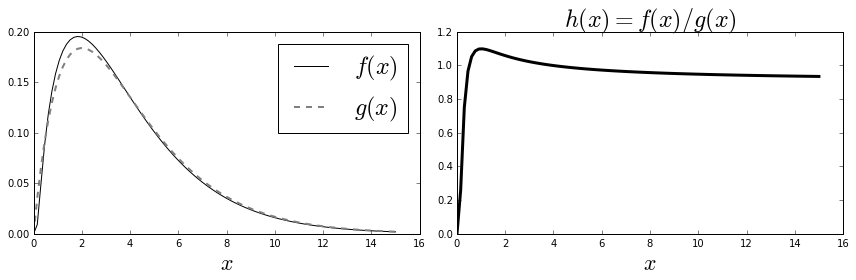

In [17]:
fig,axs=subplots(1,2,sharex=True)
fig.set_size_inches(12,4)
_=axs[0].plot(x,fx,label='$f(x)$',color='k')
_=axs[0].plot(x,ch.pdf(x),'--',lw=2,label='$g(x)$',color='gray')
_=axs[0].legend(loc=0,fontsize=24)
_=axs[0].set_xlabel(r'$x$',fontsize=22)
_=axs[1].plot(x,h(x),'-k',lw=3)
_=axs[1].set_title('$h(x)=f(x)/g(x)$',fontsize=24)
_=axs[1].set_xlabel(r'$x$',fontsize=22)
fig.tight_layout()
#fig.savefig('fig-probability/Sampling_Monte_Carlo_009.png')

<!-- dom:FIGURE: [fig-probability/Sampling_Monte_Carlo_009.png, width=500 frac=0.95] The plot on the right shows $h(x)=f(x)/g(x)$ and the one on the left shows $f(x)$ and $g(x)$ separately. <div id="fig:Sampling_Monte_Carlo_009"></div> -->
<!-- begin figure -->
<div id="fig:Sampling_Monte_Carlo_009"></div>

<p>The plot on the right shows $h(x)=f(x)/g(x)$ and the one on the left shows $f(x)$ and $g(x)$ separately.</p>
<img src="fig-probability/Sampling_Monte_Carlo_009.png" width=500>

<!-- end figure -->


 Now, let's generate  some samples from this $\chi^2$
distribution with the rejection method.

In [18]:
hmax=h(x).max()
u1 = ch.rvs(5000)        # samples from chi-square distribution
u2 = np.random.rand(5000)# uniform random samples
idx = (u2 <= h(u1)/hmax) # rejection criterion
v = u1[idx]              # keep these only

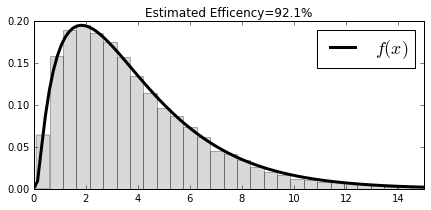

In [19]:
fig,ax=subplots()
fig.set_size_inches((7,3))
_=ax.hist(v,normed=1,bins=40,alpha=.3,color='gray')
_=ax.plot(x,fx,color='k',lw=3.,label='$f(x)$')
_=ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
_=ax.axis(xmax=15)
_=ax.legend(fontsize=18)
#fig.savefig('fig-probability/Sampling_Monte_Carlo_010.png')

<!-- dom:FIGURE: [fig-probability/Sampling_Monte_Carlo_010.png, width=500 frac=0.85]  Using the updated method, the histogram matches the target probability density function with high efficiency. <div id="fig:Sampling_Monte_Carlo_010"></div> -->
<!-- begin figure -->
<div id="fig:Sampling_Monte_Carlo_010"></div>

<p>Using the updated method, the histogram matches the target probability density function with high efficiency.</p>
<img src="fig-probability/Sampling_Monte_Carlo_010.png" width=500>

<!-- end figure -->


Using the $\chi^2$ distribution with the rejection method results in throwing
away less than 10% of the generated samples compared with our prior example
where we threw out at least 80%. This is dramatically more
efficient.  [Figure](#fig:Sampling_Monte_Carlo_010) shows that the histogram
and the probability density function match.  For completeness, [Figure](#fig:Sampling_Monte_Carlo_011) shows the samples with the corresponding
threshold $h(x)/h_{\max}$ that was used to select them.

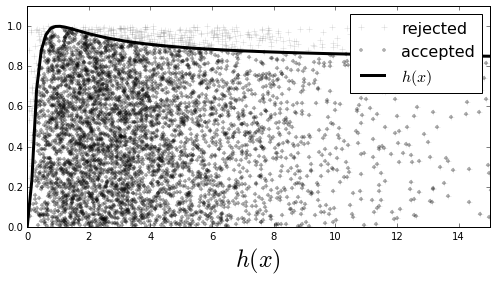

In [20]:
fig,ax=subplots()
fig.set_size_inches((7,4))
_=ax.plot(u1,u2,'+',label='rejected',alpha=.3,color='gray')
_=ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3,color='k')
_=ax.plot(x,h(x)/hmax,color='k',lw=3.,label='$h(x)$')
_=ax.legend(fontsize=16,loc=0) 
_=ax.set_xlabel('$x$',fontsize=24)
_=ax.set_xlabel('$h(x)$',fontsize=24)
_=ax.axis(xmax=15,ymax=1.1)
fig.tight_layout()
#fig.savefig('fig-probability/Sampling_Monte_Carlo_011.png')

<!-- dom:FIGURE: [fig-probability/Sampling_Monte_Carlo_011.png, width=500 frac=0.95]  Fewer proposed points were rejected in this case, which means better efficiency. <div id="fig:Sampling_Monte_Carlo_011"></div> -->
<!-- begin figure -->
<div id="fig:Sampling_Monte_Carlo_011"></div>

<p>Fewer proposed points were rejected in this case, which means better efficiency.</p>
<img src="fig-probability/Sampling_Monte_Carlo_011.png" width=500>

<!-- end figure -->


In this section, we investigated how to generate random samples from a given
distribution, beit discrete or continuous. For the continuous case, the key
issue was whether or not the cumulative density function had a continuous
inverse. If not, we had to turn to the rejection method, and find an
appropriate related density that we could easily sample from to use as part of
a rejection threshold. Finding such a function is an art, but many families of
probability densities have been studied over the years that already have fast
random number generators.

The rejection method has many complicated extensions that involve careful
partitioning of the domains and lots of special methods for corner cases.
Nonetheless, all of these advanced techniques are still variations on the same
fundamental theme we illustrated here [[dunn2011exploring]](#dunn2011exploring),[[johnson1995continuous]](#johnson1995continuous).

In [3]:
from pprint import pprint
import textwrap
import sys, re

# Useful Inequalities

In practice, few quantities can be analytically calculated. Some knowledge
of bounding inequalities helps find the ballpark for potential solutions. This
sections discusses three key inequalities that are important for 
probability, statistics, and machine learning.

## Markov's Inequality

Let $X$ be a non-negative random variable
and suppose that $\mathbb{E}(X) < \infty$. Then,
for any $t>0$,

$$
\mathbb{P}(X>t)\leq \frac{\mathbb{E}(X)}{t}
$$

 This is a foundational inequality that is
used as a stepping stone to other inequalities. It is easy
to prove. Because $X>0$, we have the following,

$$
\begin{align*}
\mathbb{E}(X)&=\int_0^\infty x f_x(x)dx =\underbrace{\int_0^t x f_x(x)dx}_{\text{omit this}}+\int_t^\infty x f_x(x)dx \\\ 
             &\ge\int_t^\infty x f_x(x)dx \ge t\int_t^\infty x f_x(x)dx = t \mathbb{P}(X>t)
\end{align*}
$$

 The step that establishes the inequality is the part where the
$\int_0^t x f_x(x)dx$ is omitted.  For a particular $f_x(x)$ that my be
concentrated around the $[0,t]$ interval, this could be a lot to throw out.
For that reason, the Markov Inequality is considered a *loose* inequality,
meaning that there is a substantial gap between both sides of the inequality.
For example, as shown in [Figure](#fig:ProbabilityInequalities_001), the
$\chi^2$ distribution has a lot of its mass on the left, which would be omitted
in the  Markov Inequality. [Figure](#fig:ProbabilityInequalities_002) shows
the two curves established by the Markov Inequality. The gray shaded region is
the gap between the two terms and indicates that looseness of the bound
(fatter shaded region) for this case.

<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_001.png, width=500 frac=0.75] The $\chi_1^2$ density has much of its weight on the left, which is excluded in the establishment of the Markov Inequality. <div id="fig:ProbabilityInequalities_001"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_001"></div>

<p>The $\chi_1^2$ density has much of its weight on the left, which is excluded in the establishment of the Markov Inequality.</p>
<img src="fig-probability/ProbabilityInequalities_001.png" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_002.png, width=500 frac=0.75] The shaded area shows the region between the curves on either side of the Markov Inequality.  <div id="fig:ProbabilityInequalities_002"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_002"></div>

<p>The shaded area shows the region between the curves on either side of the Markov Inequality.</p>
<img src="fig-probability/ProbabilityInequalities_002.png" width=500>

<!-- end figure -->


## Chebyshev's Inequality

Chebyshev's Inequality drops out directly from the Markov Inequality.  Let
$\mu=\mathbb{E}(X)$ and $\sigma^2=\mathbb{V}(X)$. Then, we have

$$
\mathbb{P}(\vert X-\mu\vert \ge t) \le \frac{\sigma^2}{t^2}
$$

 Note that if we normalize so that $Z=(X-\mu)/\sigma$, we
have $\mathbb{P}(\vert Z\vert \ge k) \le 1/k^2$. In particular,
$\mathbb{P}(\vert Z\vert \ge 2) \le 1/4$. We can illustrate this
inequality using Sympy statistics module,

In [4]:
import sympy
import sympy.stats as ss
t=sympy.symbols('t',real=True)
x=ss.ChiSquared('x',1)

  To get the left side of the Chebyshev inequality, we
have to write this out as the following conditional probability,

In [5]:
r = ss.P((x-1) > t,x>1)+ss.P(-(x-1) > t,x<1)

 This is because of certain limitations in the statistics module at
this point in its development regarding the absolute value function. We could
take the above expression, which is a function of $t$ and attempt to compute
the integral, but that would take a very long time (the expression is very long
and complicated, which is why we did not print it out above). This is because
Sympy is a pure-python module that does not utilize any C-level optimizations
under the hood.  In this situation, it's better to use the built-in cumulative
density function as in the following (after some rearrangement of the terms),

In [6]:
w=(1-ss.cdf(x)(t+1))+ss.cdf(x)(1-t)

 To plot this, we can evaluated at a variety of `t` values by using
the `.subs` substitution method, but it is more convenient to use the
`lambdify` method to convert the expression to a function.

In [7]:
fw=sympy.lambdify(t,w)

 Then, we can evaluate this function using something like

In [8]:
map(fw,[0,1,2,3,4])

[1.0,
 0.1572992070502851,
 0.08326451666355028,
 0.04550026389635853,
 0.0253473186774682]

 to produce the following [Figure](#fig:ProbabilityInequalities_003). 

<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_003.png,width=500 frac=0.85] The shaded area shows the region between the curves on either side of the Chebyshev Inequality.  <div id="fig:ProbabilityInequalities_003"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_003"></div>

<p>The shaded area shows the region between the curves on either side of the Chebyshev Inequality.</p>
<img src="fig-probability/ProbabilityInequalities_003.png" width=500>

<!-- end figure -->


**Programming Tip.**

Note that we cannot use vectorized inputs for the `lambdify` function because
it contains embedded functions that are only available in Sympy. Otherwise, we
could have used `lambdify(t,fw,numpy)` to specify the corresponding functions
in Numpy to use for the expression.



## Hoeffding's Inequality
<div id="ch:prob:sec:ineq"></div>

Hoeffding's Inequality is similar, but less loose, than Markov's Inequality.
Let $X_1,\ldots,X_n$ be iid observations such that $\mathbb{E}(X_i)=\mu$ and
$a\le X_i \le b$. Then, for any $\epsilon>0$, we have

$$
\mathbb{P}(\vert \overline{X}_n -\mu\vert \ge \epsilon) \le 2 \exp(-2 n\epsilon^2/(b-a)^2)
$$

 where $\overline{X}_n = \tfrac{1}{n}\sum_i^n X_i$. Note that we
further assume that the individual random variables are bounded.

**Corollary.** If $X_1,\ldots,X_n$ are independent with $\mathbb{P}(a\le X_i\le b)=1$
and all with $\mathbb{E}(X_i)=\mu$. Then, we have

$$
\vert\overline{X}_n-\mu\vert \le \sqrt{\frac{c}{2 n}\log \frac{2}{\delta}}
$$

 where $c=(b-a)^2$. We will see this inequality again in the machine
learning chapter. [Figure](#fig:ProbabilityInequalities_004) shows the Markov
and Hoeffding bounds for the case of ten identically and uniformly distributed
random variables, $X_i \sim \mathcal{U}[0,1]$.  The solid line shows
$\mathbb{P}(\vert \overline{X}_n - 1/2 \vert > \epsilon)$.  Note that the
Hoeffding Inequality is tighter than the Markov Inequality and that both of
them merge when $\epsilon$ gets big enough.

<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_004.png,width=500 frac=0.75] This shows the Markov and Hoeffding bounds for the case of ten identically and uniformly distributed random variables.  <div id="fig:ProbabilityInequalities_004"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_004"></div>

<p>This shows the Markov and Hoeffding bounds for the case of ten identically and uniformly distributed random variables.</p>
<img src="fig-probability/ProbabilityInequalities_004.png" width=500>

<!-- end figure -->